In [1]:
#tutorial from 
'''
https://www.kaggle.com/pranoybiswas/crime-data-eda
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Victims_of_rape.csv")

In [3]:
df_ap = df.loc[df['Area_Name']=='Andhra Pradesh']

In [4]:
df_ap.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
30,Andhra Pradesh,2001,Total Rape Victims,871,14,138,254,328,80,871,57
31,Andhra Pradesh,2001,Victims of Incest Rape,4,0,2,0,2,0,4,0
32,Andhra Pradesh,2001,Victims of Other Rape,867,14,136,254,326,80,867,57
33,Andhra Pradesh,2002,Total Rape Victims,1002,8,67,35,709,148,1002,35
34,Andhra Pradesh,2002,Victims of Incest Rape,5,0,2,0,3,0,5,0


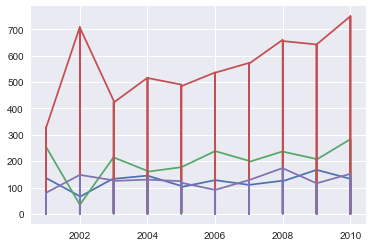

In [77]:
plot_df = plt.plot(df_ap[['Year']],df_ap[['Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']])
plt.show()


In [6]:
# from pandas.plotting import scatter_matrix
# df_ap_drop = df_ap.drop(['Area_Name','Subgroup'],axis=1)
# scatter_matrix(df_ap_drop)
# plt.show()

In [7]:
df_ap_cat = df_ap.select_dtypes(include=['object'])
df_ap_cat.head()

,Area_Name,Subgroup
30,Andhra Pradesh,Total Rape Victims
31,Andhra Pradesh,Victims of Incest Rape
32,Andhra Pradesh,Victims of Other Rape
33,Andhra Pradesh,Total Rape Victims
34,Andhra Pradesh,Victims of Incest Rape


In [132]:
df_ap_pivot = pd.pivot_table(df_ap,values=('Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs'),index=['Subgroup'],columns='Year')

In [133]:
 df_ap_pivot

Victims_Between_10-14_Yrs                           \
Year                                        2001 2002 2003 2004 2005 2006   
Subgroup                                                                    
Total Rape Victims                           138   67  135  145  106  128   
Victims of Incest Rape                         2    2    2    0    4    0   
Victims of Other Rape                        136   65  133  145  102  128   

                                           ...  Victims_Between_30-50_Yrs  \
Year                   2007 2008 2009 2010 ...                       2001   
Subgroup                                   ...                              
Total Rape Victims      110  126  167  133 ...                         80   
Victims of Incest Rape    0    2    0    0 ...                          0   
Victims of Other Rape   110  124  167  133 ...                         80   

                                                                     
Year                   2002 2003 2004 2005 2006 2007 2008 2009 2010  
Subgroup                                                             
Total Rape Victims      148  127  130  124   91  128  174  116  152  
Victims of Incest Rape    0    2    0    6    0    0    1    0    0  
Victims of Other Rape   148  125  130  118   91  128  173  116  152  

[3 rows x 40 columns]

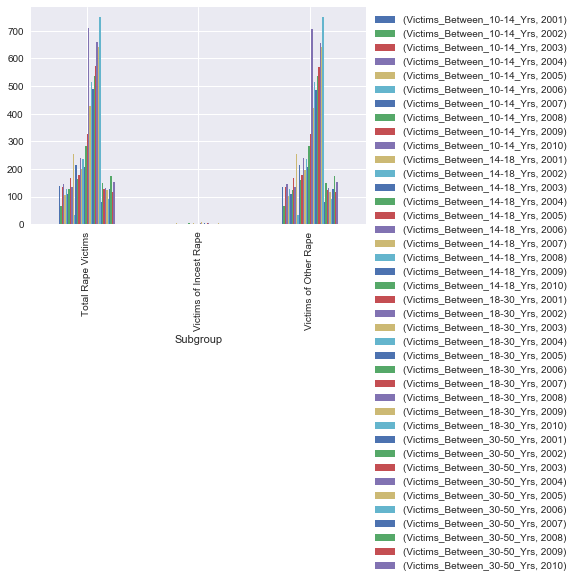

In [134]:
df_ap_pivot.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


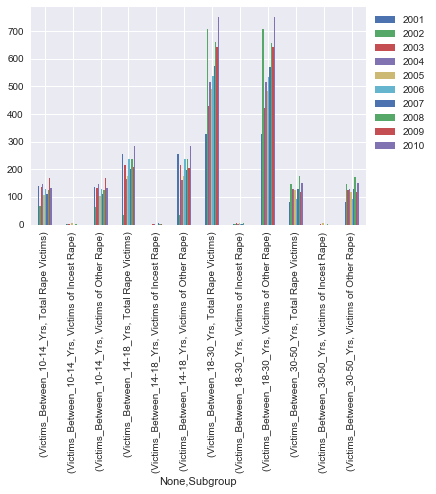

In [136]:
df_ap_pivot = df_ap_pivot.unstack('Year')
df_ap_pivot.plot(kind = 'bar')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()